## Support Vector Classifier Implementation

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [35]:
# Lets create a symthetic datapoints
from sklearn.datasets import make_classification

In [36]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0
                          ,random_state=78)

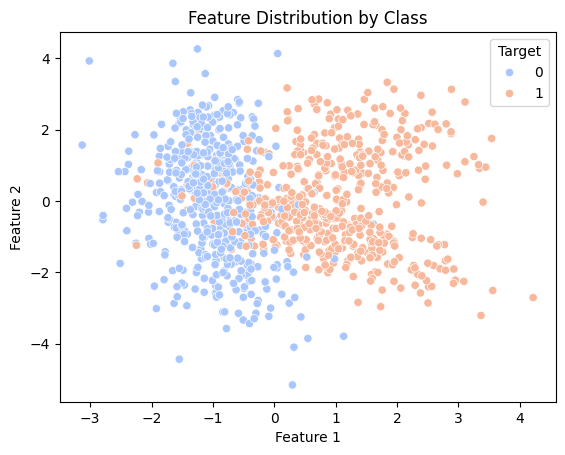

In [37]:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Target', palette='coolwarm')
plt.title("Feature Distribution by Class")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.30,random_state=47)

In [39]:
from sklearn.svm import SVC # when datapoints are seperable use kernel as linear
svc = SVC(kernel="linear")

In [40]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [41]:
y_pred = svc.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       351
           1       0.92      0.85      0.89       349

    accuracy                           0.89       700
   macro avg       0.89      0.89      0.89       700
weighted avg       0.89      0.89      0.89       700

[[326  25]
 [ 52 297]]


### Hyperparament tuning


In [44]:
from sklearn.model_selection import GridSearchCV

# Define parameter range 
param_grid = {
    "C": [0.1, 0.5, 0.7, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ['rbf', 'linear', 'poly']
}

In [45]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [46]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.883 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

,estimator,SVC()
,param_grid,"{'C': [0.1, 0.5, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [47]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [50]:
y_pred2 = grid.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       351
           1       0.94      0.88      0.91       349

    accuracy                           0.91       700
   macro avg       0.92      0.91      0.91       700
weighted avg       0.92      0.91      0.91       700

[[333  18]
 [ 42 307]]
